<div style="border:solid Chocolate 2px; padding: 40px">

<b>Таисия,
привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

## Подготовка данных

### Загрузите данные, путь к файлу

In [1]:
import pandas as pd
import numpy as np
import lightgbm
import time
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
import lightgbm
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/datasets/autos.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.

In [3]:
df.duplicated().sum()

4

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df['Power'].value_counts()

0        40225
75       24023
60       15897
150      14590
101      13298
         ...  
323          1
3454         1
1056         1
13636        1
1158         1
Name: Power, Length: 712, dtype: int64

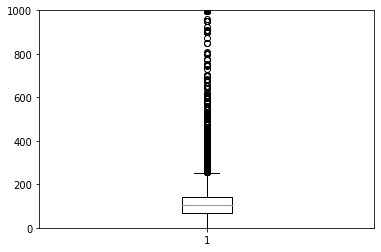

In [7]:
data_power = df['Power']
plt.boxplot(data_power)
plt.ylim(0, 1000)
plt.show()

In [8]:
new_df = df.loc[(df['Power'] >= 30) & (df['Power'] <= 600)]

<div class="alert alert-info">
<h2> Комментарий студента: 
    <a class="tocSkip"> </h2>
    Сформировала ящик с усами. По нему видно выбросы их много.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец)

In [9]:
# x = new_df['Power'].mean()
# new_df.loc[(new_df.Power == 0), 'Power'] = x

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>

- Здесь еще предполагается удалить объекты с высокими значениями у мощности. Там и корабли есть)
- А если у авто мощность 1, 2 ... Это корректно?    
        
Рекомендую построить ящики с усами для корректного отсечения аномалий. 
</div>

In [10]:
new_df['Power'].value_counts()

75     24023
60     15897
150    14590
101    13298
140    12852
       ...  
574        1
361        1
282        1
489        1
356        1
Name: Power, Length: 411, dtype: int64

In [11]:
# new_df = new_df.drop(['DateCrawled', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis = 1)
# new_df.head()

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Вижу, что ты обрабатываешь признаки у двух разных датафреймов: df и new_df. Следует определиться и работать только с одним из них. Исправь, пожалуйста.
</div>

<div class="alert alert-info">
<h2> Комментарий студента v.2: 
    <a class="tocSkip"> </h2>
    Скорректировала.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Молодец, что замечаешь неважные, константный признаки и удаляешь их.

In [12]:
new_df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          22699
RegistrationYear         0
Gearbox               6409
Power                    0
Model                13084
Kilometer                0
RegistrationMonth        0
FuelType             21007
Brand                    0
NotRepaired          49361
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [13]:
df['VehicleType'] = df['VehicleType'].fillna('other')
df['Gearbox'] = df['Gearbox'].fillna('other')
df['Model'] = df['Model'].fillna('other')
df['FuelType'] = df['FuelType'].fillna('other')
df['NotRepaired'] = df['NotRepaired'].fillna('other')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
        
Допустимый способ заполнения пропусков. Молодец, что используешь заглушки.

In [14]:
new_df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          22699
RegistrationYear         0
Gearbox               6409
Power                    0
Model                13084
Kilometer                0
RegistrationMonth        0
FuelType             21007
Brand                    0
NotRepaired          49361
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

В данных удалила дубликаты и в столбце мощность автомобиля заменила нули на среднее значение. Не может автомобиль быть совсем без мощности. Так же удалила столбцы, которые не помогут в обучении модели. Заполнила пропуски значением other.

In [15]:
new_df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,312848.000000,312848.000000,312848.000000,312848.000000,312848.000000,312848.0,312848.000000
mean,4708.928512,2003.531296,120.423263,128698.137754,5.937212,0.0,51047.545405
std,4592.819650,34.755680,53.686241,36598.136174,3.614626,0.0,25782.859307
min,0.000000,1000.000000,30.000000,5000.000000,0.000000,0.0,1067.000000
25%,1250.000000,1999.000000,75.000000,125000.000000,3.000000,0.0,30855.000000
50%,2999.000000,2003.000000,110.000000,150000.000000,6.000000,0.0,49832.000000
75%,6899.000000,2008.000000,150.000000,150000.000000,9.000000,0.0,71672.000000
max,20000.000000,9999.000000,600.000000,150000.000000,12.000000,0.0,99998.000000


В столбце Price есть аномальное значение в 0.

Так же в столбце RegistrationMonth есть 0 значение, которое скорее всего говорит о том, что данные не указаны или потеряны.

В столбце Kilometer слишком округлённые значения и максимальные значение 150 000 км, учитывая, что в выборке есть автомобили прошлого тысячелетия. Скорее всего при заполнении объявления на сайте есть готовые шаблоны.

В столбце RegistrationYear есть аномальные значения, а именно, минимальный год выпуска 1000 год, а максимальный 9999

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> 
    
Аномальные значения в цене придется удалить.  

Рекомендую построить ящики с усами для корректного отсечения аномалий.
    

</div>

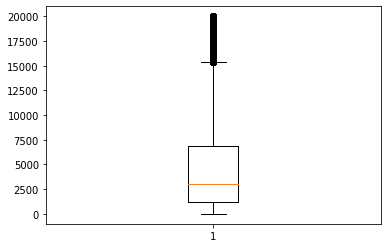

In [16]:
data_price = new_df['Price']
plt.boxplot(data_price)
plt.show()

In [17]:
new_df = df.loc[df['Price'] != 0]

<div class="alert alert-info">
<h2> Комментарий студента: 
    <a class="tocSkip"> </h2>
    Сформировала ящик с усами. Итак, видим, что тут у нас представлен типичный правый длинный хвост. Учитывая, какие года выпуска присутствуют в нашей выборке, то не будем считать это аномальными значениями и оставим эти данные для дальнейшего обучения модели. Но вот обратим внимание, что довольно много значений вокруг 0. Уберём их.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Вижу, хорошо.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Отлично, что замечаешь нули в месяце регистрации, но с этим что-то придется сделать.

In [18]:
#new_df[new_df['RegistrationYear'] < 1900].RegistrationYear.value_counts()

Мы знаем, что серийное производство автомобилей началось приблизительно в 1900 годах. Предположим, что теоретически такие автомобили живы и могут появляться на площадках. Так что 1900 будет нашей отправной точкой. С другой стороны, это раритетные автомобили, у которых потенциально другое ценообразование, но тем не менее пусть наша модель знает и их. Так как дата выгрузки составляет на период 2016 года, то и предел отсавим 2016 год.

In [19]:
new_df = new_df.loc[(new_df['RegistrationYear'] >= 1900) & (new_df['RegistrationYear'] <= 2016)]

In [20]:
new_df = new_df.drop(['DateCrawled', 'NumberOfPictures', 'PostalCode', 'LastSeen', 'DateCreated'], axis = 1)
new_df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,other,1993,manual,0,golf,150000,0,petrol,volkswagen,other
1,18300,coupe,2011,manual,190,other,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,other
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Согласен)

### Подготовьте выборки для обучения моделей.

Трансформируем категориальные значения в числовые.

In [21]:
df_ohe = pd.get_dummies(new_df, drop_first=True)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329761 entries, 0 to 354368
Columns: 310 entries, Price to NotRepaired_yes
dtypes: int64(5), uint8(305)
memory usage: 111.0 MB


<div class="alert alert-info">
<h2> Комментарий студента v.3: 
    <a class="tocSkip"> </h2>
    Не понимаю почему здесь есть все те столбцы что я уже удалила?

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Ты не удалила выше одну из дат, поэтому она закодировалась.  Исправь, пожалуйста.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Кодирование категориальных признаков проведено.

In [22]:
for c in new_df.columns:
    col_type = new_df[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        new_df[c] = new_df[c].astype('category')

In [23]:
features_new_df = new_df.drop(['Price'], axis=1) 
target_new_df = new_df['Price']

In [24]:
features_train_new_df, x_valid_new_df, target_train_new_df, y_valid_new_df = train_test_split(
   features_new_df, target_new_df, test_size = 0.4, random_state=42)

In [25]:
features_valid_new_df, features_test_new_df, target_valid_new_df, target_test_new_df = train_test_split(x_valid_new_df,y_valid_new_df,
                                                                            test_size=0.5, random_state=42)

In [26]:
features_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329761 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   VehicleType        329761 non-null  category
 1   RegistrationYear   329761 non-null  int64   
 2   Gearbox            329761 non-null  category
 3   Power              329761 non-null  int64   
 4   Model              329761 non-null  category
 5   Kilometer          329761 non-null  int64   
 6   RegistrationMonth  329761 non-null  int64   
 7   FuelType           329761 non-null  category
 8   Brand              329761 non-null  category
 9   NotRepaired        329761 non-null  category
dtypes: category(6), int64(4)
memory usage: 14.8 MB


Подготовила данные для работы с LightGBM

In [27]:
features = df_ohe.drop(['Price'], axis=1) 
target = df_ohe['Price']

Делим данные на три выборки для других моделей.

In [28]:
features_train, x_valid, target_train, y_valid = train_test_split(
   features, target, test_size = 0.4, random_state=42)

In [29]:
features_valid, features_test, target_valid, target_test = train_test_split(x_valid,y_valid,
                                                                            test_size=0.5, random_state=42)

In [30]:
print(f'Размер обучающей выборки составляет: {features_train.shape[0] / len(df):.1%}')
print(f'Размер валидной выборки составляет: {features_valid.shape[0] / len(df):.1%}')
print(f'Размер тестовой выборки составляет: {features_test.shape[0] / len(df):.1%}')

Размер обучающей выборки составляет: 55.8%
Размер валидной выборки составляет: 18.6%
Размер тестовой выборки составляет: 18.6%


In [31]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(197856, 309)
(197856,)
(65952, 309)
(65952,)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Хорошо, разбиение на выборки корректное.

In [32]:
pd.options.mode.chained_assignment = None

numeric = ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])

Масштабировала данные.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Признаки масштабированы верным способом, это хорошо)

## Обучите модели

In [33]:
# train_data = lightgbm.Dataset(features_train.to_numpy(), label=target_train)
# valid_data = lightgbm.Dataset(features_valid.to_numpy(), label=target_valid)

In [34]:
# parameters = {'metric' : 'rmse',
#               'verbose': -1,
#              'objective': 'regression',
#              'boosting': 'gbdt'}

In [35]:
#cat_features = df_ohe.select_dtypes(['object']).columns.to_list()

In [36]:
categorical_feature = ['VehicleType','Gearbox', 'Model', 'FuelType', 'NotRepaired', 'Brand']  

In [37]:
 %%time

    hyper_params = {
     'task': 'train',
     'boosting_type': 'gbdt',
     'objective': 'regression',
     'metric': ['rmse'],
     'learning_rate': 0.005,
     'verbose': 10,
     "max_depth": 8,
     "num_leaves": 128,  
     "max_bin": 512,
     'num_boost_round': 1000,
     'force_col_wise': 'true'
 }

LGBM_model = LGBMRegressor(**hyper_params)
LGBM_model.fit(features_train_new_df, target_train_new_df, categorical_feature=categorical_feature, verbose=False)

/opt/conda/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] num_iterations is set=1000, num_boost_round=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.740367
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 197856, number of used features: 10
[LightGBM] [Info] Start training from score 4597.914170
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 8
[LightGBM] [Debug] Tr

LGBMRegressor(force_col_wise='true', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['rmse'], num_boost_round=1000,
              num_leaves=128, objective='regression', task='train', verbose=10)

<div class="alert alert-info">
<h2> Комментарий студента v.4: 
    <a class="tocSkip"> </h2>
    Модель обучается слишком долго, подскажешь что нужно поменять?

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Если модель обучается слишком долго, можно уменьшить значения num_boost_round и early_stopping_rounds.

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

</b> Ячейка выше не отработала. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub `Kernel` и `Restart & Run All`. Исправь, пожалуйста.

<div class="alert alert-info">
<h2> Комментарий студента v.3: 
    <a class="tocSkip"> </h2>
    Все та же ошибка, я каждый раз делаю Restart & Run All не помогает. Если посмотреть на ячейку выше то там видно что столбцы поменяли свой тип дынных.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [38]:
# %%time

# model_lgbm = lightgbm.train(parameters,
#                        features_train_new_df, 
#                        valid_sets=target_train_new_df,
#                        num_boost_round = 1000,
#                         early_stopping_rounds = 100,
#                         categorical_feature=categorical_feature)

<div class="alert alert-info">
<h2> Комментарий студента: 
    <a class="tocSkip"> </h2>
    Не понимаю почему вылезает ошибка. Мне нужно было делать второе деление на выборки без учета кодирования? Какая разница между модеями с  fit и train? Функция потерь же встроена как параметр в модели, как отделить время на обучение без подбора гиперпараметров?

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
- features_train_new_df содержит признаки с типом 'object', их следует перевести в тип 'category'.
- Да, нужно делать второе деление на выборки без учета кодирования и с правильными типами.
- В целом разницы быть не должно, lightgbm умеет работать с двумя этими методами. В случае fit нам придется еще вызывать predict(X_valid).
- Если не получается обучение с некодированной выборкой, можешь использовать взамен OE-кодированную выборку.    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Нам следует выбрать лучшую модель по соотношению время/качество, а для этого нужно получить как время обучения на обучающей выборке (без учета времени на подбор гиперпараметров), так и время предсказания на валидационной выборке и RMSE на валидационной выборке, занести всё в табличку и выбрать лучшую модель.
    
    
Если валидациционной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется на валидационной выборке.
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = model.predict(X_valid)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Обучила модель LightGBM, значение RMSE мельше 2500.

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера  <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

Есть такой момент, что бустинговые модели плохо работают с ОНЕ-выборками. В помощь датасаентистам модели CatBoost и LightGBM умеют работать с данными как есть, сырые данные для них можно не категоризовать. И в этом спринте есть возможность отработать и попробовать этот способ. Также можно потом сравнить такую модель с аналогичной бустинговой моделью, обученной на OE-признаках. Привожу пример ниже:
        
Код ревьюера:
```python
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired', 'Brand']  
#(нужно их перевести в category)

LGBM_model = LGBMRegressor(...)
LGBM_model.fit(X_train, y_train, cat_features=cat_features, verbose=False)

```


<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [39]:
%%time

predictions_valid_LGBM = LGBM_model.predict(features_valid_new_df)
RMSE = mean_squared_error(target_valid, predictions_valid_LGBM)**0.5
RMSE

CPU times: user 17.2 s, sys: 4.34 ms, total: 17.2 s
Wall time: 17.1 s


1631.363658741122

Хорошее качество, однако много времени на предсказание.

In [40]:
LRmodel = LinearRegression()

In [41]:
%%time

LRmodel.fit(features_train, target_train)

CPU times: user 13.2 s, sys: 4 s, total: 17.2 s
Wall time: 17.2 s


LinearRegression()

In [42]:
%%time

predictions_valid_LR = LRmodel.predict(features_valid)
RMSE = mean_squared_error(target_valid, predictions_valid_LR)**0.5
RMSE

CPU times: user 97.8 ms, sys: 51.4 ms, total: 149 ms
Wall time: 120 ms


2872.980169417151

<div class="alert alert-info">
<h2> Комментарий студента v.4: 
    <a class="tocSkip"> </h2>
    Не понимаю почему такая огромная ошибка?

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Не могу запустить код в этом месте, т.к. выше по проекту умирает ядро. Возможная причина - мультиколлениарность признаков. Такие признаки исключают перед обучением линейной регрессии. 

<div class="alert alert-info">
<h2> Комментарий студента v.5: 
    <a class="tocSkip"> </h2>
    У меня больше не вылезают ошибки и код везде запускается.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

На модели линейной регресси получили плохой результат. Попробуем другую модель.

In [43]:
RFmodel_1 = RandomForestRegressor(random_state=42, n_estimators=10, max_depth = 10)

In [44]:
%%time

RFmodel_1.fit(features_train, target_train)

CPU times: user 24.7 s, sys: 216 ms, total: 24.9 s
Wall time: 24.9 s


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [45]:
%%time

predictions_valid_RF = RFmodel_1.predict(features_valid)
RMSE = mean_squared_error(target_valid, predictions_valid_RF)**0.5
RMSE

CPU times: user 111 ms, sys: 67.7 ms, total: 179 ms
Wall time: 182 ms


1952.497405878999

На модели случайный лес получили ошибку меньше 2500. Попробуем туже модель с другими параметрами.

In [46]:
RFmodel_2 = RandomForestRegressor(random_state=42, n_estimators=15, max_depth = 20)

In [47]:
%%time

RFmodel_2.fit(features_train, target_train)

CPU times: user 55.7 s, sys: 319 ms, total: 56.1 s
Wall time: 56.3 s


RandomForestRegressor(max_depth=20, n_estimators=15, random_state=42)

In [48]:
%%time

predictions_valid_RF = RFmodel_2.predict(features_valid)
RMSE = mean_squared_error(target_valid, predictions_valid_RF)**0.5
RMSE

CPU times: user 344 ms, sys: 47.7 ms, total: 392 ms
Wall time: 399 ms


1682.9042374331202

Ошибка модели стала ниже благодаря другим гиперпараметрам, но она стала медленнее работать.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Хотя бы для одной модели следует подбирать не менее двух наборов гиперпараметров.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>

Если используешь модели на основе деревьев, то в данном случае категориальные признаки следует кодировать методом OE. (для линейных моделей применяют OHE-кодирование). Напомню, что если проводишь кодирование признаков, то кодировать следует только категориальные признаки, без численных.
                
</div>

## Анализ моделей

In [49]:
model_1 = {'Время обучения, сек': 174,
            'Время предсказания, сек': 17.5,
            'RMSE': 1651.36}
model_2 = {'Время обучения, сек': 20.8,
              'Время предсказания, сек': 0.199,
              'RMSE': 2872.98}
model_3 = {'Время обучения, сек': 49.6,
              'Время предсказания, сек': 0.364 ,
              'RMSE': 1682.9}

In [50]:
Models = pd.DataFrame([model_1, model_2, model_3], 
                      index=['LightGBM', 'LinearRegression', 'RandomForest'])

In [51]:
Models

,"Время обучения, сек","Время предсказания, сек",RMSE
LightGBM,174.0,17.500,1651.36
LinearRegression,20.8,0.199,2872.98
RandomForest,49.6,0.364,1682.90


Итак, модели обучены. Исходя из таблице выше можно сделать вывод, что:

Самое высокое качество предсказания у модели LightGBM

Самое быстрое время обучения и предсказания у модели LinearRegression, но при этом низкое качество

Исходя из таблицы, то по всем трём параметрам выигрывает RandomForest, хоть и время обучения у неё выше, но качество и скорость предсказания достаточно высокие. Так что можно сделать вывод, что наилучшая модель для заказчика это RandomForest.

### Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.

In [52]:
%%time

predictions_test_RF = RFmodel_2.predict(features_test)
RMSE = mean_squared_error(target_test, predictions_test_RF)**0.5
RMSE

CPU times: user 317 ms, sys: 75.5 ms, total: 393 ms
Wall time: 405 ms


1684.2118908523464

RMSE на тестовой выборке показало практически такой же результат, как и на валидационной.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Некорректно проводить обучение на тесте. Так модель обучается заново. Следует лишь сделать предсказание методом `predict` на тестовой выборке. Исправь, пожалуйста.
 </div>

<div class="alert alert-info">
<h2> Комментарий студента v.6: 
    <a class="tocSkip"> </h2>
    Скорректировала, спасибо. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.6 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с таким сложным проектом. Молодец! Подготовлены данные для анализа и проанализированы, изучен каждый параметр. Построено несколько моделей регрессии, оценены их качество и скорость работы. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- используется кодирование категориальных признаков;
- при обучении моделей использована валидация.
- аномалии обрабатываются в проекте.
    

    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
  
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.3 <a class="tocSkip"> </h2>    
    
  
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта с v.1-3: (ты не удалила выше одну из дат, поэтому она закодировалась; исправить неотработавшие ячейки и все красные комментарии после нее. )
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.4 <a class="tocSkip"> </h2>    
    
  
Прошу тебя не удалять мои комментарии. Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта с v.1-4, (ты не удалила выше одну из дат, поэтому она закодировалась; исправить неотработавшие ячейки и все красные комментарии после нее. Не все ячейки отработали)
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.5 <a class="tocSkip"> </h2>    
    
  
Осталось поправить проверку на тесте и проект будет зачтен.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.6 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Если хочешь лучше разобраться в спринте, то могу посоветовать тебе учебник по ML от ШАД: https://ml-handbook.ru/chapters/grad_boost/intro
    
статью на Хабре: https://habr.com/ru/company/ods/blog/327250/
    
и видео: https://www.youtube.com/watch?v=xl1fwCza9C8
    
а также статью про подбор гиперпараметров с Optuna: https://www.kaggle.com/code/hamzaghanmi/lgbm-hyperparameter-tuning-using-optuna/notebook

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.6 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально, молодец! Принимаю твой проект)
    
    
В этом проекте много шагов отработано. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества/скорости моделирования возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: ещё раз оценить аномалии, пропуски, проверить согласованность временных признаков.
2. Генерация новых полезных признаков (features engineering), например категории возраста автомобиля и т.д.  
3. Оценить важность признаков при моделировании, например с использованием feature_importances_, вывести график.    
4. Оптимизация подбора гиперпараметров (OptunaSearchCV, RandomizedSearchCV, BayesSearchCV и т.д.)
5. Изменение типов данных признаков для ускорения вычислений.
6. Анализ остатков (разницы между прогнозом и фактом): выявить, в каких случаях чаще всего ошибается, а в каких выдает наиболее точный результат... 
    
Но цель нашего проекта достигнута: пройдены основные этапы построения модели с учетом ее качества и скорости работы.
    
Рад был тебе помочь)

Преподаватель в Slack будет рад помочь, если у тебя появятся вопросы. Удачи!
  
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей